<a href="https://colab.research.google.com/github/EstefRZ99/rocket-girls-workshop/blob/main/Taller_Rocket_Girls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

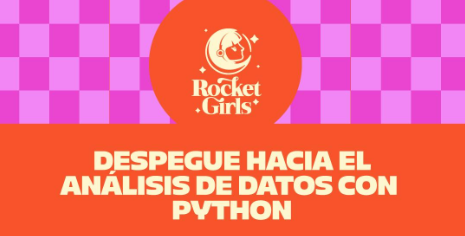

# Despegue hacia el an√°lisis de datos con Python:: ‚ô• üöÄ

# **Descargar librer√≠as**

Cada una de esas l√≠neas importa una herramienta que vamos a usar en el notebook.


-Pandas es la librer√≠a est√°ndar en Python para trabajar con datos tabulares (‚Äúhojas de c√°lculo‚Äù en memoria). Con ella creas y manipulas DataFrame, filtras, agrupas, calculas estad√≠sticas, etc.
from IPython.display import display


-En Jupyter o Colab, display() muestra objetos (como DataFrames o gr√°ficos) de forma m√°s bonita que print(). Permite, por ejemplo, que un DataFrame aparezca como tabla con scroll, o que las im√°genes se rendericen inline.


-import matplotlib.pyplot as plt
Matplotlib es la librer√≠a ‚Äúmadre‚Äù de visualizaci√≥n en Python; pyplot es su interfaz que emula la forma de trabajar de MATLAB. Con plt dibujas gr√°ficas, configuras t√≠tulos, ejes, leyendas, etc.


-import seaborn as sns
Seaborn est√° construido sobre matplotlib y ofrece gr√°ficos estad√≠sticos con estilos m√°s atractivos por defecto (mapas de calor, distribuciones, pares de gr√°ficos, etc.). Usamos el alias sns para llamarlo r√°pidamente.

# Paso 1 .Configurar el entorno

In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

En el c√≥digo de pandas, df es simplemente el nombre que solemos dar a la variable que guarda un DataFrame, que es la estructura tabular (filas y columnas) con tus datos. Por ejemplo:

from sklearn.datasets import fetch_california_housing
‚Äì Le dice a Python: ‚ÄúQuiero usar la funci√≥n fetch_california_housing que viene dentro del m√≥dulo datasets de scikit‚Äëlearn‚Äù.
‚Äì scikit‚Äëlearn es una librer√≠a muy popular para machine learning y an√°lisis de datos.


as_frame=True
‚Äì Con este par√°metro le decimos: ‚ÄúEn lugar de devolver arrays de NumPy, entr√©game todo ya listo como un DataFrame de pandas‚Äù.
‚Äì Un DataFrame es como una hoja de c√°lculo en Python: tiene filas, columnas con nombre y permite hacer limpiezas y gr√°ficos muy f√°cilmente.

# 2. Cargar Dataset


In [ ]:
# ## 2. Cargar el dataset de California Housing
# Usamos as_frame=True para obtener un DataFrame directamente
data = fetch_california_housing(as_frame=True)
df = data.frame

# Qu√© significa cada columna

MedInc: ingreso medio del grupo de manzanas (en decenas de miles de d√≥lares).

HouseAge: antig√ºedad mediana de las viviendas en el grupo (en a√±os).

AveRooms: n√∫mero promedio de habitaciones por hogar.

AveBedrms: n√∫mero promedio de dormitorios por hogar.

Population: poblaci√≥n total del grupo de manzanas.

AveOccup: n√∫mero promedio de ocupantes por hogar.

Latitude: latitud geogr√°fica del grupo de manzanas.

Longitude: longitud geogr√°fica del grupo de manzanas.

MedHouseVal: valor medio de la vivienda en el grupo (en decenas de miles de d√≥lares).

# 3.Inspeccionar r√°pidamente

In [ ]:
# ## 3. Inspecci√≥n inicial
# Info: tipos de columnas y valores no nulos
print("=== Informaci√≥n del DataFrame ===")
df.info()
# Primeras filas para ver c√≥mo luce la tabla
print("\n=== Primeras 5 filas ===")
display(df.head())

=== Informaci√≥n del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

=== Primeras 5 filas ===


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

# Qu√© significa cada resultado ‚ù§

1.‚Äú20640 entries, 0 to 20639‚Äù

-Significa que tienes 20‚ÄØ640 casas anotadas, numeradas de la 0 a la 20‚ÄØ639.

2.‚Äútotal 9 columns‚Äù

-Hay 9 columnas, es decir, 9 cosas distintas que registramos de cada casa (como ingreso medio, edad de la casa, n√∫mero de cuartos, etc.).


3.‚ÄúNon-Null Count‚Äù

-Cada columna dice cu√°ntos de esos 20‚ÄØ640 valores no est√°n vac√≠os. Como todas muestran ‚Äú20640 non-null‚Äù, quiere decir que no falta ning√∫n dato en ninguna columna.


4.‚ÄúDtype: float64‚Äù

-‚Äúfloat64‚Äù es solo la forma elegante de decir ‚Äún√∫mero con decimales‚Äù. Las 9 columnas guardan n√∫meros con decimales (por eso aparecen cosas como 8.3252).


5‚Äúmemory usage: 1.4 MB‚Äù

-Es cu√°nta ‚Äúmemoria‚Äù (espacio en el ordenador) usa todo ese cuaderno: 1.4 megabytes, que es muy poco, as√≠ que el cuaderno cabe f√°cil en la computadora.

# Resumen: Esas dos l√≠neas sirven para explorar r√°pidamente el DataFrame
df.info()

Muestra un resumen de la estructura:

Cantidad de filas y columnas

Nombre y tipo de cada columna

Cu√°ntos valores no nulos tiene cada columna

Uso aproximado de memoria

## 4. limpiar y preparar

In [ ]:
df = df.drop_duplicates().dropna()


# 1. Eliminar filas duplicadas:
drop_duplicates() busca filas que sean exactamente iguales (id√©nticas en todas las columnas).

Elimina las filas repetidas y deja solo una fila √∫nica de cada conjunto de filas duplicadas.

# 2. Eliminar filas con datos faltantes (NaN):
dropna() revisa cada fila para detectar valores faltantes o NaN (Not a Number).

Si encuentra al menos un valor faltante en alguna columna de la fila, elimina toda esa fila.



# 5.Exploraci√≥n detallada y an√°lisis exploratorio de datos (EDA)

df.describe() genera estad√≠sticas resumidas exclusivamente para columnas num√©ricas.

Incluye conteo (count), promedio (mean), desviaci√≥n est√°ndar (std), valores m√≠nimos y m√°ximos (min, max), y los percentiles (25%, 50%, 75%).

df.describe(include='all')
Muestra estad√≠sticas tanto de variables num√©ricas como no num√©ricas (categ√≥ricas, booleanas, de fecha, etc.).

Es √∫til para an√°lisis exploratorio cuando quer√©s ver:

Cu√°ntos valores √∫nicos hay en columnas categ√≥ricas.

Cu√°l es el valor m√°s frecuente.

Con qu√© frecuencia aparece.

Y los estad√≠sticos normales en columnas num√©ricas.

In [ ]:
# ## 4. Estad√≠sticos descriptivos
# Nos ayudan a identificar rangos y posibles outliers
print("\n=== Estad√≠sticos descriptivos (num√©ricos) ===")
display(df.describe())

# Si quisieras incluir tambi√©n variables no num√©ricas:
print("\n=== Estad√≠sticos descriptivos (todas) ===")
display(df.describe(include='all'))




=== Estad√≠sticos descriptivos (num√©ricos) ===


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010


=== Estad√≠sticos descriptivos (todas) ===


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

# **An√°lisis de la columna MedInc (Ingreso medio por bloque)**


Imagina que cada bloque es una ‚Äúcaja‚Äù con un valor de ingreso medio. Estas m√©tricas nos ayudan a entender c√≥mo se distribuyen esos valores.

1. Cantidad de datos (count)
¬øQu√© mide? Cu√°ntos bloques tenemos registrados.

Ejemplo: 20 640 ‚Üí Hay 20 640 cajas con un valor de ingreso medio.

2. Promedio (mean)
¬øQu√© mide? El valor t√≠pico si sumas todos los ingresos y los divides entre la cantidad de bloques.

Ejemplo: 3.87 ‚Üí $38 700

¬øC√≥mo entenderlo? Si repartieras equitativamente el ingreso total entre todas las cajas, cada una tendr√≠a unos $38 700.

3. Desviaci√≥n est√°ndar (std)
¬øQu√© mide? Qu√© tanto se alejan, en promedio, los ingresos individuales del promedio.

Ejemplo: 1.90 ‚Üí $19 000

¬øC√≥mo entenderlo? La mayor√≠a de las cajas est√°n a unos $19 000 por encima o por debajo de esos $38 700.

4. Valor m√≠nimo (min)
¬øQu√© mide? El ingreso m√°s bajo registrado.

Ejemplo: 0.4999 ‚Üí $4 999

¬øC√≥mo entenderlo? Hay al menos una caja que solo llega a $4 999 de ingreso medio.

5. Primer cuartil (25 %)
¬øQu√© mide? El punto por debajo del cual est√° el 25 % de las cajas.

Ejemplo: 2.5634 ‚Üí $25 634

¬øC√≥mo entenderlo? Una de cada cuatro cajas gana $25 634 o menos.

6. Mediana (50 %)
¬øQu√© mide? El valor central: la mitad de las cajas queda por debajo y la mitad por encima.

Ejemplo: 3.5348 ‚Üí $35 348

¬øC√≥mo entenderlo? Dos de cada cuatro cajas (o la mitad) ganan $35 348 o menos.

7. Tercer cuartil (75 %)
¬øQu√© mide? El punto por debajo del cual est√° el 75 % de las cajas.

Ejemplo: 4.7433 ‚Üí $47 433

¬øC√≥mo entenderlo? Tres de cada cuatro cajas ganan $47 433 o menos.

8. Valor m√°ximo (max)
¬øQu√© mide? El ingreso m√°s alto registrado.

Ejemplo: 15.0001 ‚Üí $150 001

¬øC√≥mo entenderlo? Hay al menos una caja que llega a $150 001 de ingreso medio.



# 6. Visualizaci√≥n de Datos

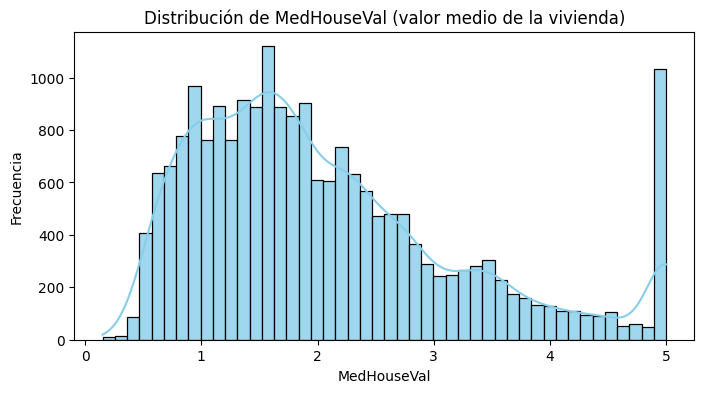

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(
    df['MedHouseVal'],    # Columna a graficar
    kde=True,             # L√≠nea KDE
    color='skyblue',      # Color de las barras y la l√≠nea
    edgecolor='black',    # Borde de las barras
    alpha=0.8             # Transparencia
)  # ¬°Cierra aqu√≠ el par√©ntesis de sns.histplot!
plt.title('Distribuci√≥n de MedHouseVal (valor medio de la vivienda)')
plt.xlabel('MedHouseVal')
plt.ylabel('Frecuencia')
plt.show()

# Ese bloque de c√≥digo sirve para ver c√≥mo se distribuyen los valores de la columna MedHouseVal (el precio medio de la vivienda

Pasos

plt.figure(figsize=(8, 4))
Crea un lienzo de 8√ó4 pulgadas, ajustando el tama√±o de la gr√°fica para que sea legible.

sns.histplot(df['MedHouseVal'], kde=True)

Histograma (histplot): dibuja barras que muestran cu√°ntas casas (o ‚Äúbloques‚Äù) caen en cada rango de precios.

kde=True: a√±ade una l√≠nea suave (estimaci√≥n de densidad) encima del histograma, para ver la forma ‚Äúcurva‚Äù de la distribuci√≥n.

Etiquetas y t√≠tulo

plt.title(...) ponle un t√≠tulo a la gr√°fica, para que sepan qu√© est√°n viendo.

plt.xlabel(...) y plt.ylabel(...) nombran los ejes (precio en el eje X y frecuencia en el eje Y).

plt.show()
Muestra la gr√°fica en pantalla.



# 1. Gr√°fico de dispersi√≥n (Scatterplot)

plt.figure(figsize=(8, 5))
Crea un lienzo de 8√ó5 pulgadas para el gr√°fico, controlando su tama√±o.

sns.scatterplot(...)
Dibuja puntos cuya posici√≥n en el eje X es el ingreso medio (MedInc) y en el eje Y el valor medio de la vivienda (MedHouseVal).

data=df indica que toma las columnas de tu DataFrame df.

alpha=0.6 fija la transparencia de los puntos para ver mejor zonas muy densas.

plt.title, plt.xlabel, plt.ylabel
A√±aden t√≠tulo y etiquetas a los ejes para que quien vea el gr√°fico entienda qu√© representa cada dimensi√≥n.

plt.show()
Muestra el gr√°fico en pantalla.

¬øPara qu√© sirve?
Te ayuda a ver si a mayor ingreso promedio de bloque (MedInc) tiende a corresponder un mayor precio de viviendas (MedHouseVal), y detectar patrones o dispersiones.

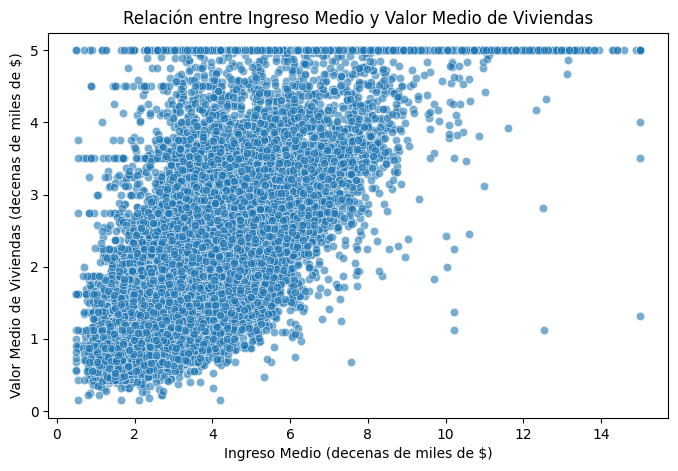

In [ ]:
#1. Gr√°fico de dispersi√≥n (Scatterplot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.6)
plt.title('Relaci√≥n entre Ingreso Medio y Valor Medio de Viviendas')
plt.xlabel('Ingreso Medio (decenas de miles de $)')
plt.ylabel('Valor Medio de Viviendas (decenas de miles de $)')
plt.show()


# 2. Boxplot de la variable objetivo

sns.boxplot(x=df['MedHouseVal'])
Dibuja un diagrama de caja de la distribuci√≥n de MedHouseVal:

La caja muestra el rango intercuart√≠lico (25 %‚Äì75 %).

La l√≠nea interior es la mediana (50 %).

Los ‚Äúbigotes‚Äù y los puntos fuera de ellos se√±alan posibles outliers.

¬øPara qu√© sirve?
Detectar valores at√≠picos y entender r√°pidamente la dispersi√≥n y simetr√≠a de tu variable objetivo.

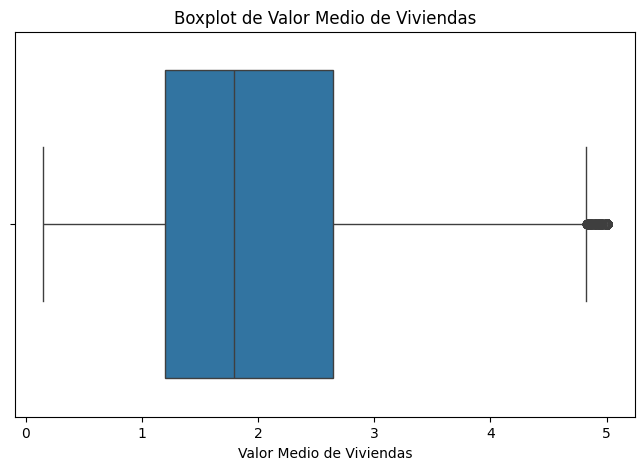

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MedHouseVal'])
plt.title('Boxplot de Valor Medio de Viviendas')
plt.xlabel('Valor Medio de Viviendas')
plt.show()


# 3. Mapa de calor de correlaciones (Heatmap)

df.corr()
Calcula la matriz de correlaci√≥n entre todas las columnas num√©ricas del DataFrame.

sns.heatmap(...)
Representa esa matriz como un mapa de calor:

annot=True escribe el coeficiente de correlaci√≥n en cada celda.

cmap='coolwarm' usa una escala de colores que va de azul (correlaci√≥n negativa) a rojo (positiva).

fmt='.2f' formatea los n√∫meros con dos decimales.

¬øPara qu√© sirve?
Te permite identificar de un vistazo qu√© variables est√°n m√°s relacionadas entre s√≠ (por ejemplo, si MedInc se correlaciona fuertemente con MedHouseVal) y cu√°les no aportan informaci√≥n redundante.

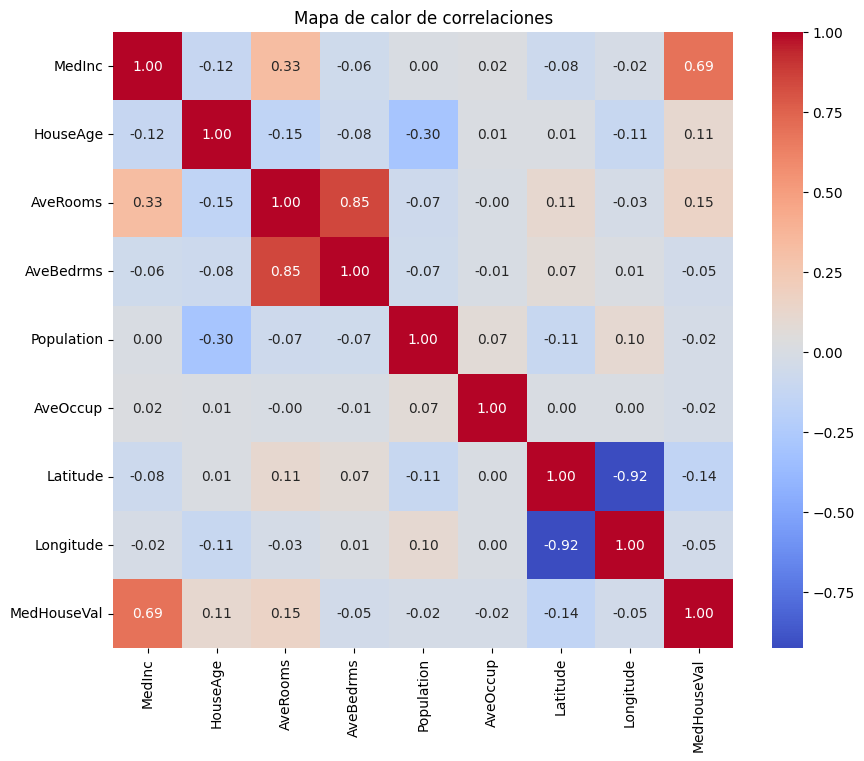

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()


# Visualizaciones y hallazgos clave
Histograma de MedHouseVal

Distribuci√≥n sesgada a la derecha: hay m√°s bloques con valores de vivienda bajos-medios y unos pocos bloques con valores muy altos (outliers).

Sirve para identificar rangos m√°s frecuentes y posibles valores at√≠picos.

Scatterplot MedInc vs MedHouseVal

Revela una relaci√≥n positiva: bloques con mayores ingresos tienden a tener viviendas de mayor valor.

La nube de puntos muestra densidad creciente hacia valores medios, pero sugiere heterogeneidad en los extremos.

Boxplot de MedHouseVal

Destaca la caja (rango intercuart√≠lico) entre $12 000 y $26 500 y la mediana en $18 000.

Aparecen ‚Äúbigotes‚Äù que abarcan gran parte de la distribuci√≥n y algunos puntos aislados como posibles outliers por encima de $40 000.

Mapa de calor de correlaciones

MedInc y MedHouseVal presentan la correlaci√≥n m√°s alta dentro del conjunto, reflejando la dependencia ingresos‚Äìprecio vivienda.

Otras variables (por ejemplo, HouseAge, AveRooms) muestran correlaciones moderadas o bajas, √∫tiles para seleccionar caracter√≠sticas en un posible modelo predictivo.

(Todas las visualizaciones provienen del an√°lisis con matplotlib y seaborn en el notebook)


# Conclusiones y siguientes pasos
El dataset est√° limpio y completo, sin valores faltantes.

La distribuci√≥n de valores medios de vivienda es asim√©trica, con unos pocos casos extremos que convendr√≠a analizar por separado.

Existe una relaci√≥n clara entre el ingreso medio del bloque y el valor medio de la vivienda, lo que sugiere que MedInc es una variable predictora fuerte.

Otras variables podr√≠an aportar, pero conviene revisar multicolinealidad (a trav√©s de la matriz de correlaciones) antes de construir modelos de regresi√≥n.

Recomendaciones:

Explorar transformaciones (logar√≠tmicas) para normalizar variables muy sesgadas.

Detectar y decidir qu√© hacer con los outliers extremos.

Evaluar modelos de regresi√≥n simple y m√∫ltiple para predecir MedHouseVal, validando con t√©cnicas de cross-validation.